<a href="https://colab.research.google.com/github/syedaquib153/Big-market-Sales/blob/main/Big_Mart_Sales_Prediction_by_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Big Mart Sales Prediction using Machine Learning with Python. In this project, XGBoost Regressor is used for Prediction.***


***AIM:***The aim is to build a predictive model and find out the sales of each product at a particular store

**IMPORTING LIBRARIES** 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Collection and Analysis**

In [ ]:
#Loading Dataset from  CSV file to Pandas frame

In [ ]:
big_mart_dataset=pd.read_csv('/content/drive/MyDrive/excel/Train.csv')

In [ ]:
#First 5 rows of DataFrame
df=big_mart_dataset
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# Number Of Rows and Columns in DataFrame
df.shape

(8523, 12)

In [ ]:
#Describtion of DataFrame
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Checking for Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling The Missing Value**

Mean--> Average

Mode-->More Repeated Values

In [ ]:
# Mean  value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184135976

In [ ]:
# Filling null values with the mean values"Item_Weight"
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
# Mode value of "Outlet_Size"
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
# Filling null values with mode values "Outlet_Size"
missing_values=df['Outlet_Size'].fillna(df['Outlet_Size'].mode(),inplace=True)

In [ ]:
print(missing_values)

None


In [ ]:
# Filling the missing Values with mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
# miss values
miss_values=df['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [ ]:
sns.set

<function seaborn.rcmod.set>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


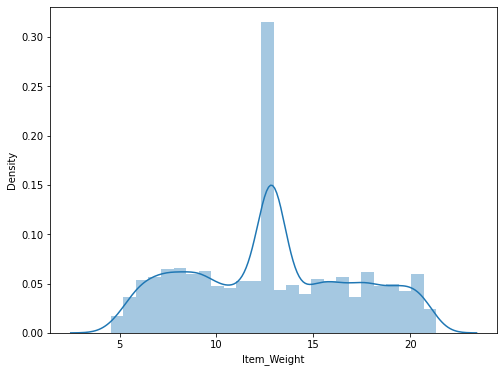

In [ ]:
# "	Item_Weight" distribution
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Weight'])
plt.show()

INFERENCE: Max of Item_weight =12.85

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


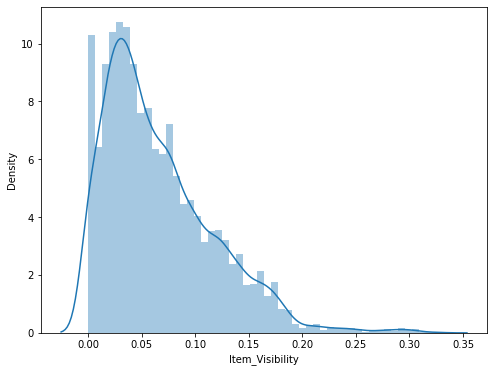

In [ ]:
# "	Item_Visibility" distribution
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Visibility'])
plt.show()

INFERENCE= Max Visiblity of the product in market=0.0066

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


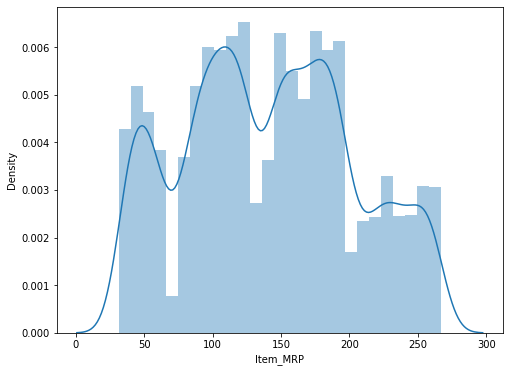

In [ ]:
# "	Item_MRP" distribution
plt.figure(figsize=(8,6))
sns.distplot(df['Item_MRP'])
plt.show()

In [ ]:
df['Item_MRP'].max()

266.8884

INFERENCE: Max Item_MRP of products is US $266.88

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


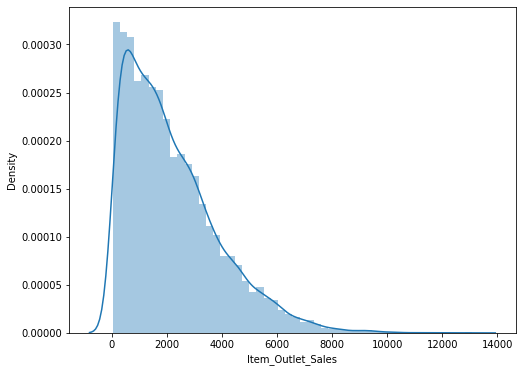

In [ ]:
# "	Item_Outlet_Sales" distribution
plt.figure(figsize=(8,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [ ]:
df['Item_Outlet_Sales'].max()

13086.9648

INFERENCE: Max Item_Outlet_sales of product=13086

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


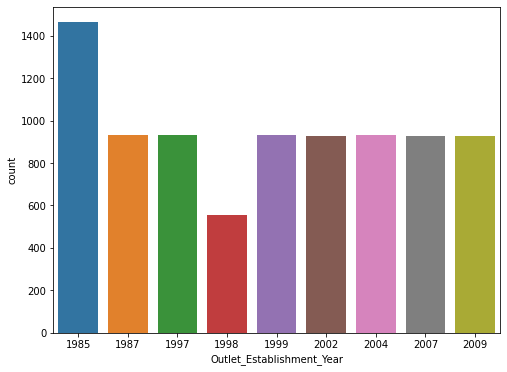

In [ ]:
# "	Outlet_Establishment_Year" distribution
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

INFERENCE: MAX year of Outlet_Establishment_Year = 1985

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


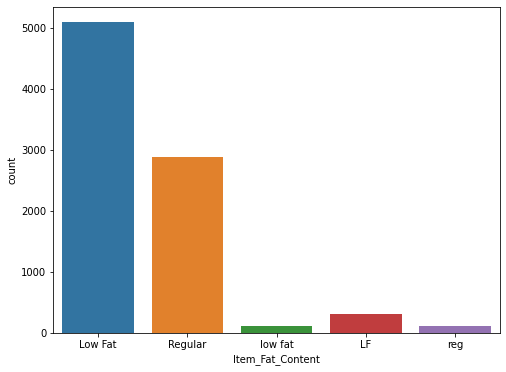

In [ ]:
# "	Item_Fat_Content" distribution
plt.figure(figsize=(8,6))
sns.countplot(df['Item_Fat_Content'])
plt.show()

Replacing Label Names in "Item_Fat_Content"

In [ ]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [ ]:
# Value Counting "Item_Fat_Content"
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


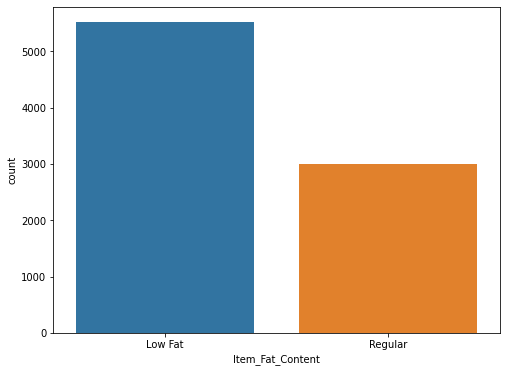

In [ ]:
# "	Item_Fat_Content" distribution
plt.figure(figsize=(8,6))
sns.countplot(df['Item_Fat_Content'])
plt.show()

INFERENCE= Low Fat Content Is More

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


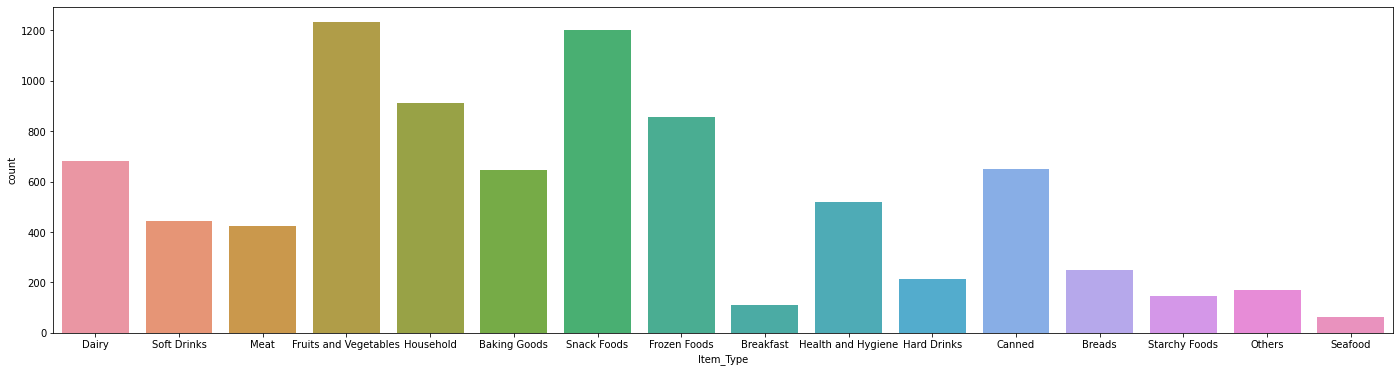

In [ ]:
# "	Item_Type" distribution
plt.figure(figsize=(24,6))
sns.countplot(df['Item_Type'])
plt.show()

Label Encoding

This approach is very simple and it involves converting each value in a column to a number.

In [ ]:
encoder=LabelEncoder()

In [ ]:
df['Item_Identifier']= encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']= encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']= encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']= encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


**Splitting Features And Target**

In [ ]:
X=df.drop(columns='Item_Outlet_Sales',axis=1)

In [ ]:
# Target
Y=df['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**Splitting the data into Training Data and Testing Data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)


**MACHINE LEARNING MODEL**

By using XGBOOST REGRESSOR

In [ ]:
regressor= XGBRegressor()

In [ ]:
regressor.fit(X_train, y_train)

[16:08:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Evaluation**

In [ ]:
# prediction on training data
train_data_prediction=regressor.predict(X_train)

 ***The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model.***

In [ ]:
# R Squared Value
r2_train=metrics.r2_score(y_train,train_data_prediction)

In [ ]:
print('The R Squared Value = ',r2_train)

The R Squared Value =  0.6329771198896497


INFERENCE= R-squared value 0.5 < r < 0.7 then value is generally considered a Moderate effect size for training model

In [ ]:
# Predicting on Test Data
test_data_prediction= regressor.predict(X_test)

In [ ]:
# R Squared Value
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [ ]:
print(' The R Squared Value = ',r2_test)

 The R Squared Value =  0.5806913419800449


INFERENCE= R-squared value 0.5 < r < 0.7 then value is generally considered a Moderate effect size for testing model

**NOTE=** The value of R-square can also be negative when the model fitted is worse than the average fitted model

**CONCLUSION**

The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.
Since a training model and testing model is half of a ideal value.
we conclude that the model is Moderate  